# 0. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sn

sns.set_style("whitegrid") 

# 1. Import Data

In [2]:
raw_data = pd.read_csv('pokemon.csv')

# 2. Exploratory Data Analysis

In [3]:
raw_data.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [4]:
round(raw_data.describe(), 2)

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.00,1045.00,1045.00,1045.00,1045.00,1045.00,1045.00
mean,439.31,70.07,80.47,74.66,73.02,72.29,68.81
std,121.97,26.67,32.41,31.24,32.72,28.07,30.21
min,175.00,1.00,5.00,5.00,10.00,20.00,5.00
25%,330.00,50.00,55.00,50.00,50.00,50.00,45.00
50%,458.00,68.00,77.00,70.00,65.00,70.00,65.00
75%,515.00,82.00,100.00,90.00,95.00,90.00,90.00
max,1125.00,255.00,190.00,250.00,194.00,250.00,200.00


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


In [6]:
raw_data.isnull().sum()

Name          0
Total         0
HP            0
Attack        0
Defence       0
Sp_attack     0
Sp_defence    0
Speed         0
dtype: int64

In [7]:
round(raw_data.median(), 1)

Total         458.0
HP             68.0
Attack         77.0
Defence        70.0
Sp_attack      65.0
Sp_defence     70.0
Speed          65.0
dtype: float64

In [8]:
df = raw_data.copy()

# 3. Visualise Data

## Histogram

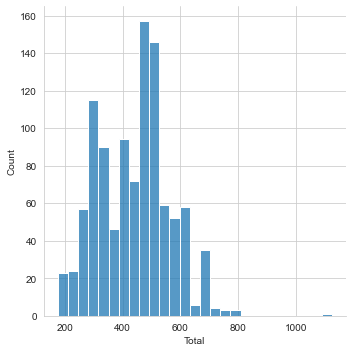

In [9]:
sns.displot(df['Total'])

## Correlation Plot

<AxesSubplot:>

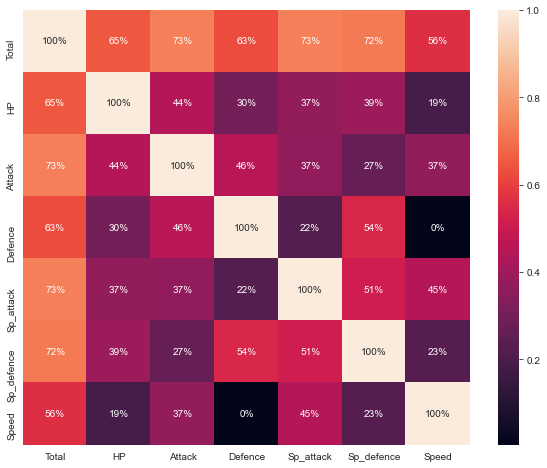

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt= '.0%')

There appears to be a low correlation between the variables. This is supprising as we expect Pokémon with a high attack level to have a high sp_attack level. Maybe I need to watch more Pokémon.

## Violin Plot

Create the HP Group Levels

In [11]:
Group_HP = ""
df['Group_HP'] = Group_HP
df['Group_HP'] = np.where(df.HP <= np.quantile(df.HP, q=0.25), 'Weak',
                         (np.where(df.HP<=np.quantile(df.HP, q=0.75), 'Average', 'Strong')))

df.tail(3)

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed,Group_HP
1042,Calyrex,500,100,80,80,80,80,80,Strong
1043,Mega Calyrex,680,100,165,150,85,130,50,Strong
1044,Mega Calyrex X,680,100,85,80,165,100,150,Strong


Text(0.5, 1.0, 'Group HP ViolinPlot')

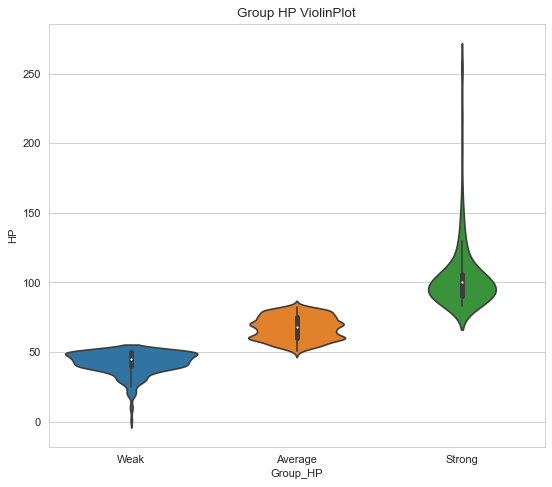

In [12]:
plt.figure(figsize=(8,7), dpi=80)
sns.violinplot(x="Group_HP", y="HP" , data=df).set_title('Group HP ViolinPlot') 

## Scatter Plot

<Figure size 800x960 with 0 Axes>

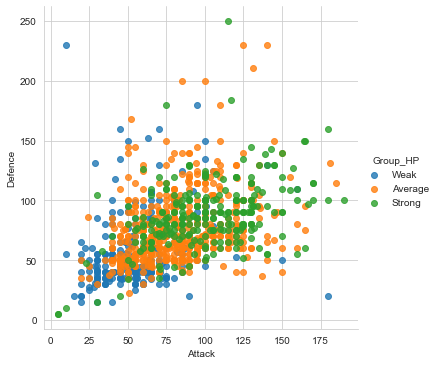

In [13]:
plt.figure(figsize=(10,12), dpi= 80)
sns.lmplot(x= 'Attack', y= 'Defence', data= df,
           fit_reg= False,
          hue='Group_HP')

## Quartile Plot

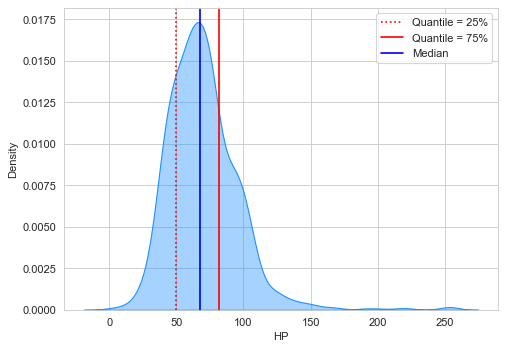

In [14]:
plt.figure(figsize=(7,5), dpi=80)
sns.kdeplot(df['HP'], shade=True, color='dodgerblue', alpha=.4)

plt.axvline(x = np.quantile(df.HP, q=0.25), color='red', linestyle=':', label='Quantile = 25%') # Quantile=50
plt.axvline(x = np.quantile(df.HP, q=0.75), color='red', linestyle='-', label='Quantile = 75%') # Quantile=82
plt.axvline(x = df['HP'].median(), color='b', label='Median') # Median = 68

plt.legend()
plt.show()

In [15]:
def show_line(n, a):  
    z = a.axvline(x = np.quantile(n, q=0.25), color='r', linestyle=':', label='Quantile = 25%')
    b = a.axvline(x = np.quantile(n, q=0.75), color='r', linestyle='--', label='Quantile = 75%')
    c = a.axvline(x = n.median(), color='b', label='Median')
    return z, b, c


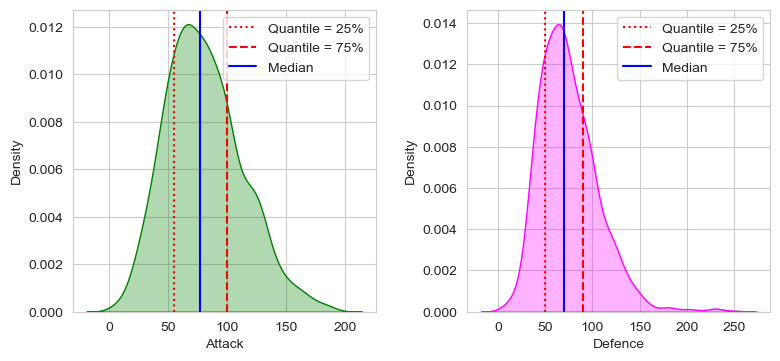

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,45), dpi=100)
ax1, ax2 = ax.flatten()
fig.set_size_inches(9, 4)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

#Attack
sns.kdeplot(df['Attack'], ax=ax1, shade=True, color='green', alpha =.3)
show_line(df.Attack, ax1)
ax1.legend()

#Defence
sns.kdeplot(df['Defence'], ax=ax2, shade=True, color='magenta', alpha =.3)
show_line(df.Defence, ax2)
ax2.legend()

plt.show()